# **Preparacion de colab**

---



# Clonamos el repositorio para obtener los dataSet

In [8]:
!git clone https://github.com/alexxsnjr/machine_learning-examples.git

fatal: destination path 'machine_learning-examples' already exists and is not an empty directory.


# Damos acceso a nuestro Drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Test it acceso al contenedor



In [10]:
ls '/content/drive/My Drive' 

'Colab Notebooks'/   Documentos/


# Google colab tools

In [11]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Plantilla de Pre Procesado 

---



#importar las librerías


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [15]:
dataset = pd.read_csv('/content/machine_learning-examples/datasets/purchased_by_country_and_salary.csv')
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


Del siguiente dataset vamos a querer predecir la columna pruchased, por lo que vamos a quitar del dataset esta columna.


In [ ]:
#con iloc decimos que queremos todas las filas (:) y todas las columnas menos la ultima (:-1)
x = dataset.iloc[:, :-1].values
print(x)


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


Ahora vamos a obtener la variable dependiente del dataset (la clumna pruchased)

In [ ]:
y = dataset.iloc[:, 3].values
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


# Tratamiento de los datos nulos

Como vemos en el dataset hay valores nulos (NaN) antes de usar el data set tenemos que hacer algo con estos valores.


Podemos hacer varias cosas para solucionarlo:

*   Eliminar las filas que tengas datos nulos
*   Rellenar los datos nulos con diferentes estrategias:

  *   usar La media de todos los datos que si tenemos
  *   usar algun percentil
  
    ...

Por ahora vamos a usar la media. Para ello usaremos la libreria sklearn





In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from re import X
# con np.nan usamos una variable de la libreria numpy que tiene valor = nan
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer = imputer.fit(x[:,1:3]) 
x[:, 1:3] = imputer.transform(x[:,1:3])
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Codificar datos categoricos

En nuestro data set tenemos variables de tipo categorico. Es decir tipos de datos que son usado para etiquetar la información, como puede ser el pais y la columan purchased.

En los dataset de entrenamiento no podemos tener datos categoricos, ya que estos no tienen ninguna forma de relacionarse entre ellos ni de compararse, así que tenemos que "encodearlos".

Para esto vamos a usar 2 estrategias, Label encoding y One Hot Encoding. 
Nos ayudaremos de la libreria sklearn para hacerlo.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

Si por ejemplo para la columna pais usamo la estrategia de laber encoder el resutlado nos daría una asignacion numerica a cada pais.

In [ ]:
labelencoder_X = LabelEncoder()
badExample = x.copy()
badExample[:, 0] = labelencoder_X.fit_transform(badExample[:, 0])
print(badExample[:,:1])

[[0]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [0]
 [1]
 [0]]


Esto no es correcto, puesto que ha diferentes valores categoricos les estamos asignado valores ordinales sin criterio alguno. Por ejemplo estamos diciendo que Francia = 0 y Spain = 2 . ¿Por lo que francia vale menos que España? o ¿Francai va antes que España? 
Este criterio no tiene sentido, por lo que usarmes One Hot Encodign en este caso

In [ ]:
#Definimos el colum transformer para la columna 0
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   
    remainder='passthrough'                        
)
oneHotEncodigData = np.array(ct.fit_transform(x), dtype=np.integer)
print(oneHotEncodigData[:,0:3])

[[1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


<ipython-input-66-14d37512cf57>:6: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  oneHotEncodigData = np.array(ct.fit_transform(x), dtype=np.integer)


Lo que acabamos de hacer es convertir la columan 1 de paises en 3 columnas de modo que nos quedaria algo como esto:

```
# France | Germany | Spain
  1        0        0
  0        0        1
  0        1        0
```

De este modo aplanamos nuesto dataset para no tener valores categoricos usando one hot encoding


Para el encoding de la columna Purchased sera mas sencillo, ya que solo es un valor binario de si/no y si que podemos usar un label encoding

In [ ]:
labelencoder_y = LabelEncoder()
purchasedEncoding = labelencoder_y.fit_transform(y)
print(y)
print(purchasedEncoding)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


Si no hacemos las cosas correctamente, es posible que el modelo considere como validado, solo los datos que se han usado para entrenar el modelo, sin reconocer ningún otro dato que sea un poco diferente a la base de datos inicial. Este fenómeno se llama overfitting en machine learning.

Por eso en nuestro entrenamientos es importante dividir una parte del dataset para comprobar los datos una vez entrenado el algoritmo.

Para ello crearemos 4 variables, valores de entrenamiento, variable predictiva, vaiable de test y variable de test predictiva.
Esto lo haremos con sklearn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(oneHotEncodigData, purchasedEncoding, test_size = 0.2, random_state = 0)

print(X_train,y_train )

print(X_test,y_test )


[[    0     1     0    40 63777]
 [    1     0     0    37 67000]
 [    0     0     1    27 48000]
 [    0     0     1    38 52000]
 [    1     0     0    48 79000]
 [    0     0     1    38 61000]
 [    1     0     0    44 72000]
 [    1     0     0    35 58000]] [1 1 1 0 1 0 0 1]
[[    0     1     0    30 54000]
 [    0     1     0    50 83000]] [0 0]


# Escalado de variables

En un algoritmo de clasificación como el que estamos implementando, se tiende a comparar los datos numericos, como en este caso puede ser la edad y el salario.

Para comparar si por ejemplo un usuario esta cerca de otro se suele utilizar la [distancia euclidea](https://es.wikipedia.org/wiki/Distancia_euclidiana) 

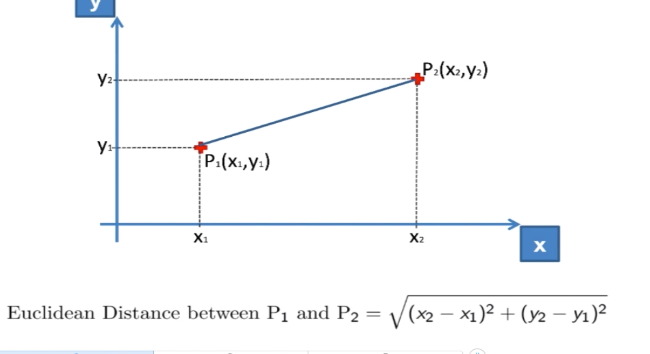

segun la imagen vamos a suponer que p1 es el **español de age = 27 & salary = 48.000** y que el p2 es el **aleman de age = 50 & salary = 83.000**


```
X1 = 50 y1 = 83000
X2 = 27 y2 = 48000

(X1 - X2)2 + (Y1 - Y2)2
(23)2 + (3500)2
529 + 12350000000

```
Como vemos la diferencia del cuadrado de las edades y la diferencia del cuadrado de los salarios es demasido grande, la suma de las edades apenas tendra impacto y pasara inadvertida en distancias euclideas como esta.

Para solucionar esto podemos escalar nuestros datos, es decir normalizarlos para que por ejemplo los valores de la edad esten entre 0 y 1 o que el algoritmo de mas valor a los datos que tienen mas importancia y no a los que tienen mas valor en si.
Hay 2 estrategias , estandarización y normalización.

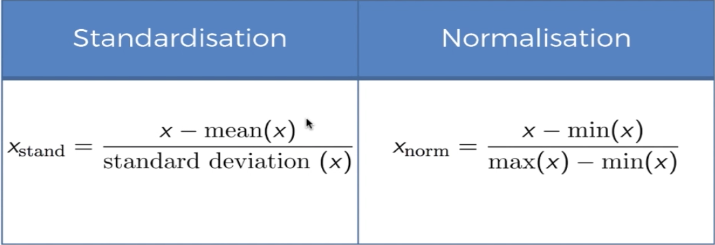



*   La estandarización: 
Esta operación tiende a generar una campana de gaus en la que muchos valores tienden a estar cercanos al cero.

* La Normalización : Esta operación escala de forma lineal todos los valores entre 0 y 1 donde 0 sera el valor minimo y 1 el maximo.




In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
#al conjunto de test se le aplica transform para usar el mismo escalado que se usa en el conjunto de entrenamiento.
X_test = sc_X.transform(X_test)